# Données Série "Time Series"

In [674]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercice 0:
- Charger le dataset fourni dans le dossier "data" avec la date comme index
- Quel est la plage horaire totale couverte par le dataset ?
- Quelle est la taille du dataframe (nombre de lignes et de colonnes) ?

In [675]:
df = pd.read_csv("data/dataset.csv")
df.rename({"date.utc": "datetime"}, axis=1, inplace=True)
df.datetime = pd.to_datetime(df.datetime)
df.set_index("datetime", inplace=True)
df

,value,occupancy,value2,value3
datetime,,,,
2019-06-21 00:00:00+00:00,20.0,49,59,18
2019-06-20 23:00:00+00:00,21.8,70,44,34
2019-06-20 22:00:00+00:00,26.5,49,76,39
2019-06-20 21:00:00+00:00,24.9,75,63,23
2019-06-20 20:00:00+00:00,21.4,22,44,13
...,...,...,...,...
2019-05-07 06:00:00+00:00,26.0,77,29,16
2019-05-07 04:00:00+00:00,16.0,75,4,44
2019-05-07 03:00:00+00:00,19.0,24,6,1


In [676]:
df.index[0] - df.index[-1]

Timedelta('44 days 23:00:00')

In [677]:
print("Columns:", len(df.columns))
print("Lines:", len(df.index))

Columns: 4
Lines: 2068


## Exercice 1:
- Plotter chaque colonnes du dataset
- Quelles sont selon vous les colonnes les plus corrélées avec "Occupancy", en regardant les graphes ?

<AxesSubplot:xlabel='datetime'>

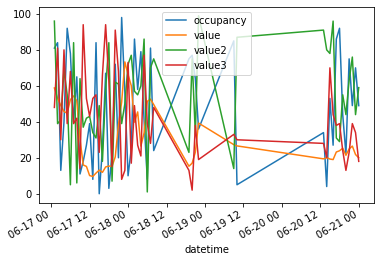

In [678]:
# TODO: remove .head(n)
df[["occupancy", "value", "value2", "value3"]].head(50).plot()

**Les plus corrélées sont celles dont le graphes se ressemble le plus: ici orange et rouge**

## Exercice 2:
- Calculer les corrélations entre les colonnes du dataset.
- Les afficher sous format numériques et sous format de heatmap 
   - Les deux en même temps, c'est-à-dire sous format de heatmap avec les valeurs numériques est accepté
- Est-ce que les corrélations numériques correspondent à votre prédiction à l'exercice précédent ?

In [679]:
corr = df.corr()
corr

,value,occupancy,value2,value3
value,1.000000,0.017384,-0.022655,-0.002275
occupancy,0.017384,1.000000,-0.001365,-0.049701
value2,-0.022655,-0.001365,1.000000,0.016254
value3,-0.002275,-0.049701,0.016254,1.000000


# Heatmap using matplotlib

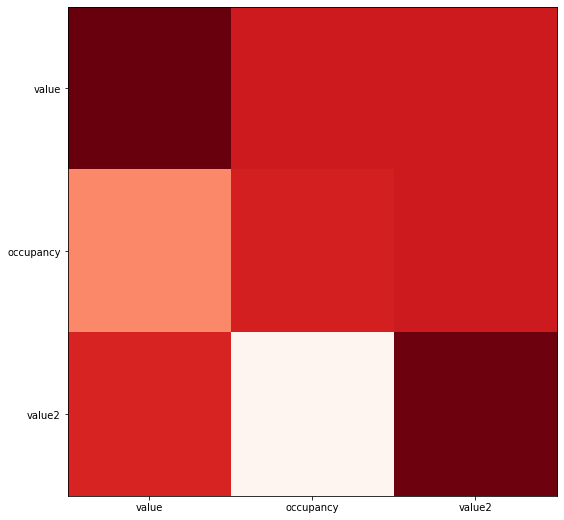

In [680]:
fig, ax = plt.subplots(figsize=(11, 9))

x = corr.index.to_numpy()
y = corr.columns.to_numpy()

ax.set_xticks(np.arange(len(x) - 1))
ax.set_yticks(np.arange(len(y) - 1))

ax.set_xticklabels(x[:-1])
ax.set_yticklabels(y[:-1])

used_values = np.tril(corr.to_numpy(), -1)[1:, :-1]

ax.imshow(used_values, cmap=cm.Reds)

# Heatmap using seaborn

<AxesSubplot:>

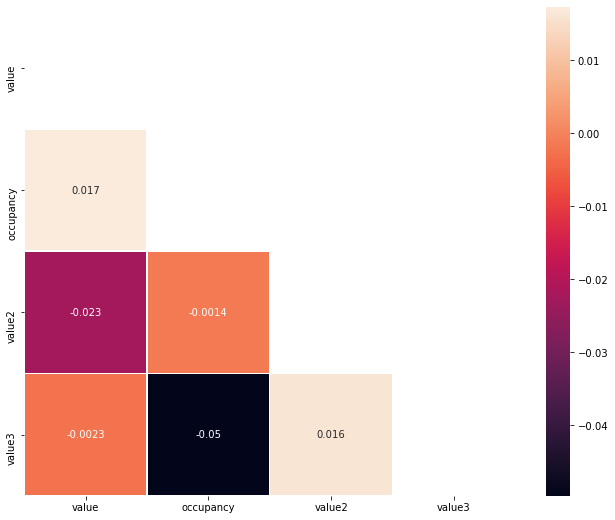

In [681]:
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr , dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,  linewidths=.5)

## Exercice 3:
- Afficher les boxplots par colonne et par jour, avec un graphe par colonne.
    - Vous devriez avoir une graphe avec un boxplot par jour pour la première colonne, puis un graphe avec un boxplot par jour pour la seconde colonne, etc.
- Expliquer ce que signifie le boxplot (les différentes barres et les points)

array([[<AxesSubplot:title={'center':'value'}, xlabel='[day, month, year]'>,
        <AxesSubplot:title={'center':'value2'}, xlabel='[day, month, year]'>],
       [<AxesSubplot:title={'center':'value3'}, xlabel='[day, month, year]'>,
        <AxesSubplot:title={'center':'occupancy'}, xlabel='[day, month, year]'>]],
      dtype=object)

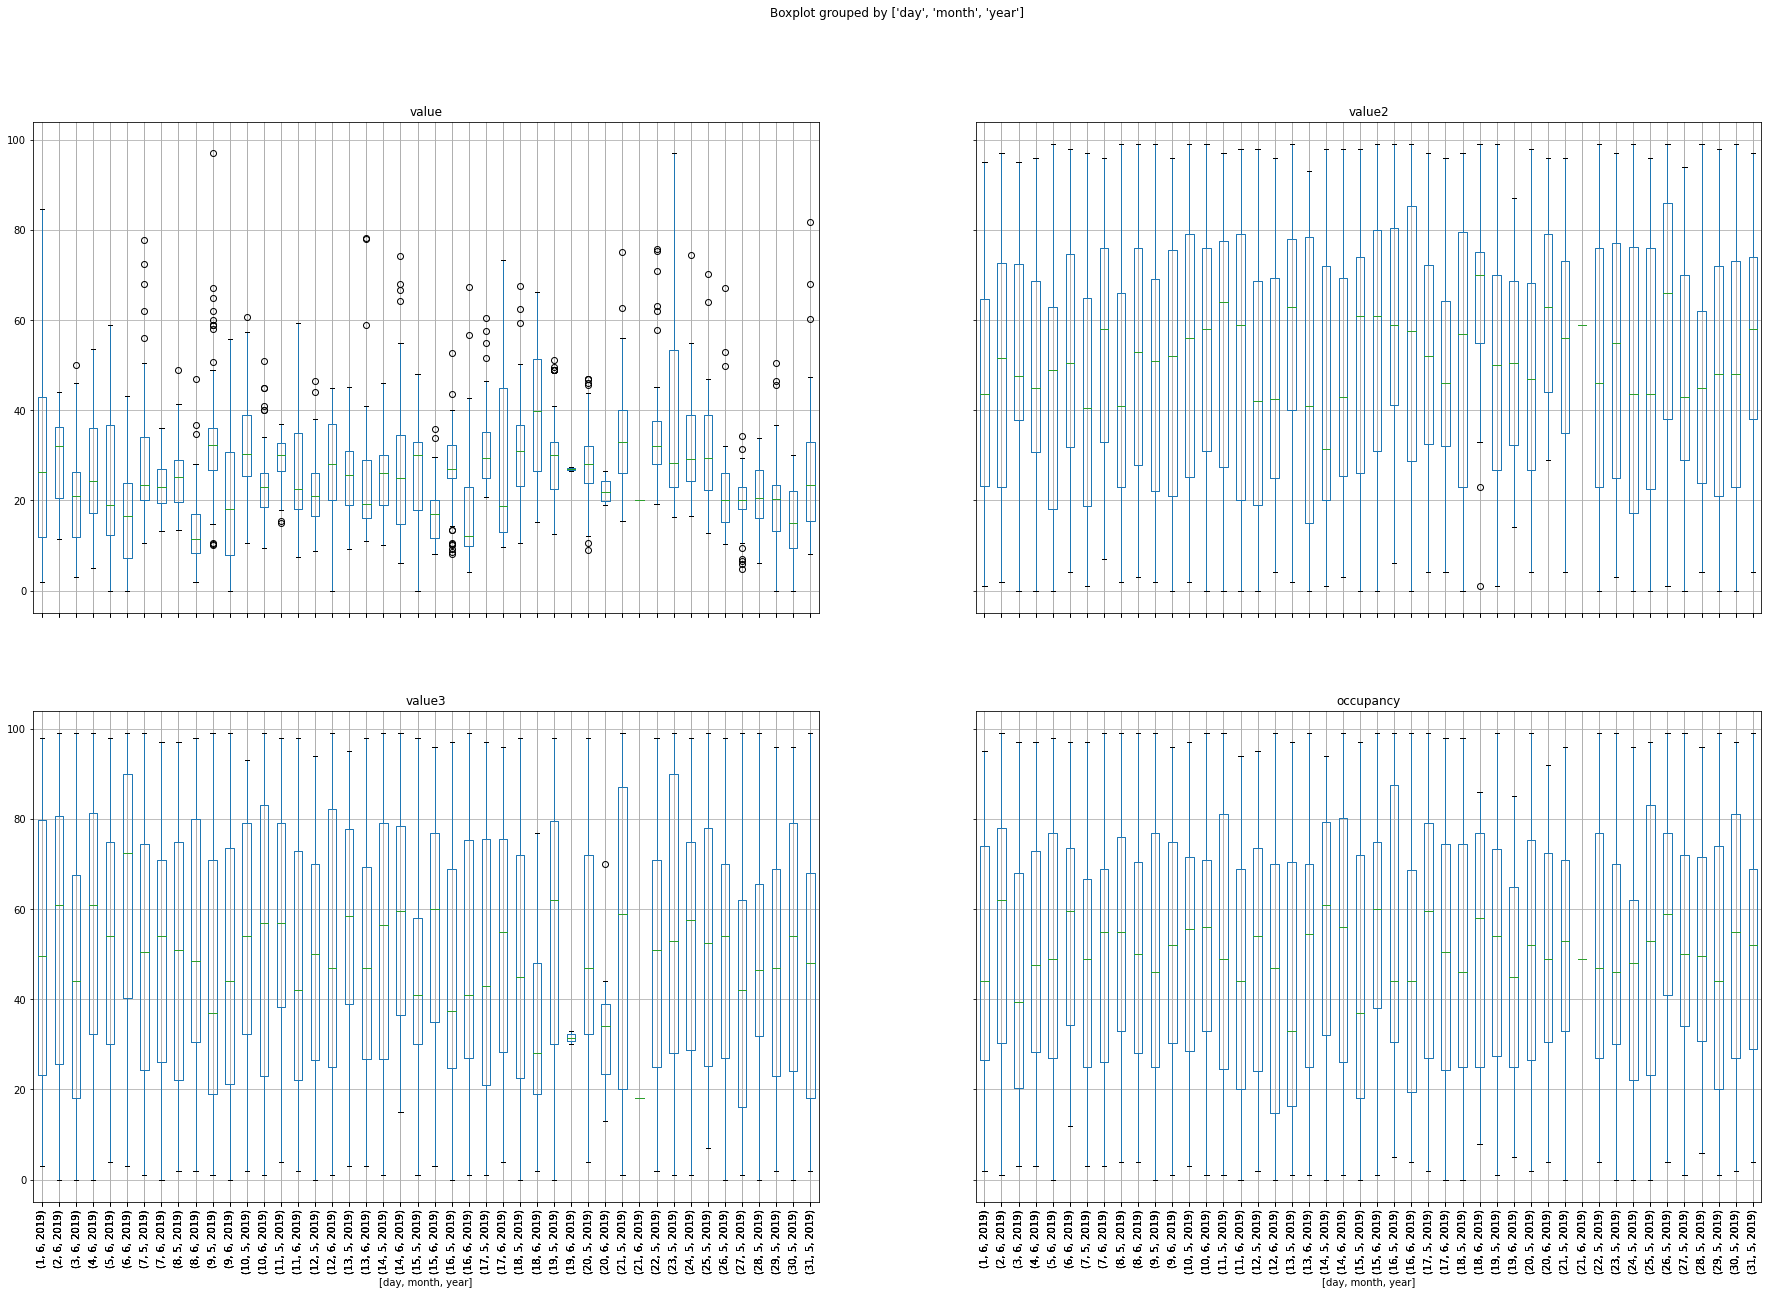

In [682]:
df["day"] = df.index.day
df["month"] = df.index.month
df["year"] = df.index.year

df.boxplot(
    ["value", "value2", "value3", "occupancy"],
    by=["day", "month", "year"],
    figsize=(30, 20),
    rot=90
)

## Exercice 4:
- Calculer et afficher l'auto-corrélation de chaque colonne. 
- Calculer le lag optimal non trivial pour chaque colonne.
- Afficher sur le même graphe chaque colonne avec la version laguée d'elle-même, avec le lag optimal obtenu précédemment.

In [696]:
df.value.autocorr()

0.8659848058396395

In [684]:

df.value2.autocorr()

-0.03408640377739126

In [685]:

df.value3.autocorr()

-0.0025761442361679847